# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [70]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

### Análise da questão 1:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03bcc8e9d0>,
      dtype=object)

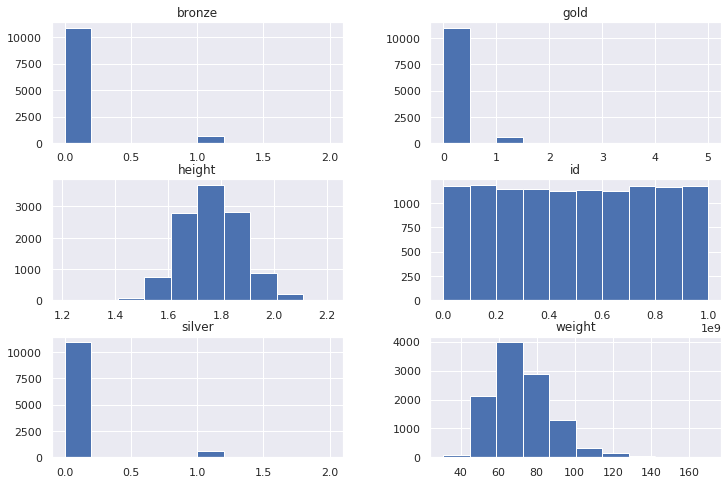

In [13]:
athletes.hist()

In [6]:
# Sua análise começa aqui.
aux = get_sample(athletes, 'height', 3000)


In [7]:
aux

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
         ... 
1483     1.75
2586     1.78
2949     1.60
10268    1.75
5892     1.76
Name: height, Length: 3000, dtype: float64

In [19]:
stats, p_value = sct.shapiro(aux)

In [20]:
bool(p_value > 0.05)

False

### Plote o histograma dessa variável (com, por exemplo, bins=25). A forma do gráfico e o resultado do teste são condizentes? Por que?

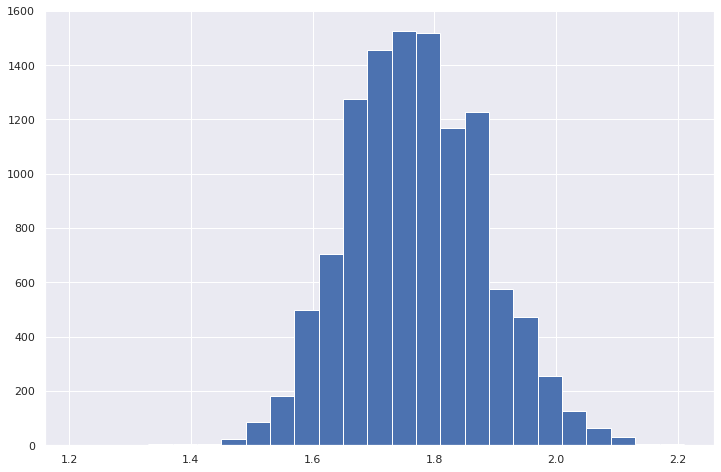

In [21]:
athletes.height.hist(bins = 25)

### Plote o qq-plot para essa variável e a analise.

((array([-3.8458266 , -3.62261851, -3.50016483, ...,  3.50016483,
          3.62261851,  3.8458266 ]),
  array([1.21, 1.33, 1.33, ...,  nan,  nan,  nan])),
 (nan, nan, nan))

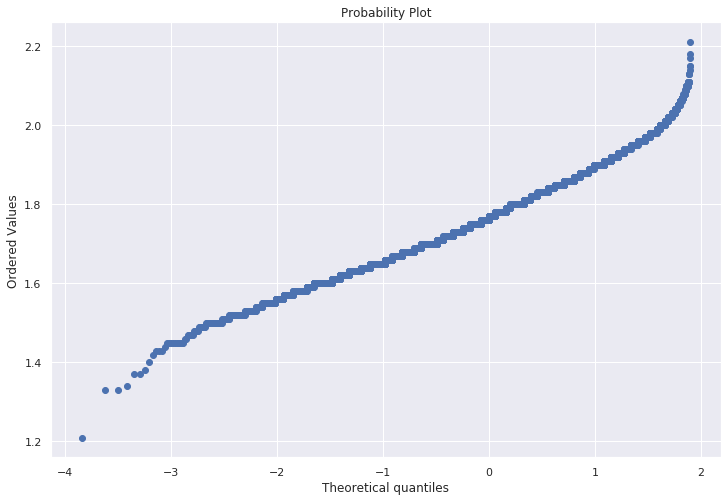

In [22]:
sct.probplot(athletes.height, dist ='norm', plot =plt)

### Análise da questão 2:

In [23]:
aux

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
         ... 
1483     1.75
2586     1.78
2949     1.60
10268    1.75
5892     1.76
Name: height, Length: 3000, dtype: float64

In [24]:
?sct.jarque_bera

In [25]:
stats_q2, p_value_q2 = sct.jarque_bera(aux)

In [27]:
bool(p_value_q2 > 0.05)

False

### Análise da questão 3:

In [29]:
sample_weight = get_sample(athletes, 'weight', 3000)

In [32]:
?sct.normaltest

In [33]:
stats_q3, p_value_q3 = sct.normaltest(sample_weight)

In [51]:
p_value_q3 

1.5898922918029537e-111

In [35]:
bool(p_value_q3 > 0.05)

False

#### Plote o histograma dessa variável (com, por exemplo, bins=25). A forma do gráfico e o resultado do teste são condizentes? Por que?

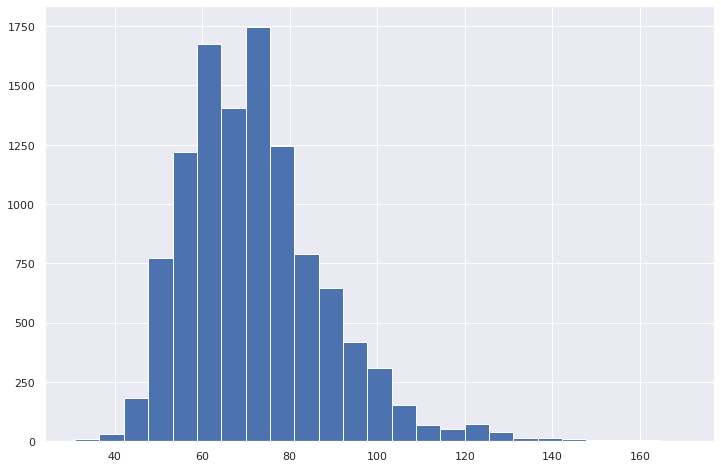

In [36]:
athletes.weight.hist(bins = 25)

#### Um box plot também poderia ajudar a entender a resposta.

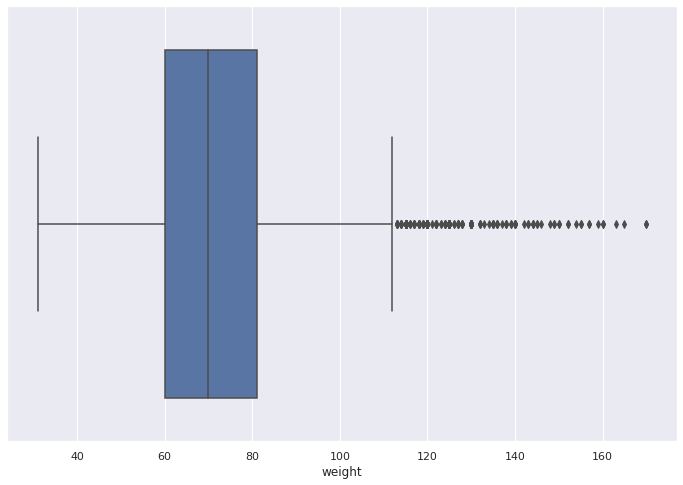

In [38]:
sns.boxplot(athletes.weight)

### Análise da questão 4:


Para melhor representar os dados é possível realizar uma transformação logarítmica
np.log(df['Columns'])
link: https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html


In [45]:
sample_weight_q4 = get_sample(athletes, 'weight', 3000)

In [47]:
aux_q4 = np.log(sample_weight_q4)

In [48]:
stats_q4, p_value_q4 = sct.normaltest(aux_q4)

In [50]:
p_value_q4

1.0705572101256944e-10

In [49]:
bool(p_value_q4 > 0.05)

False

#### Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

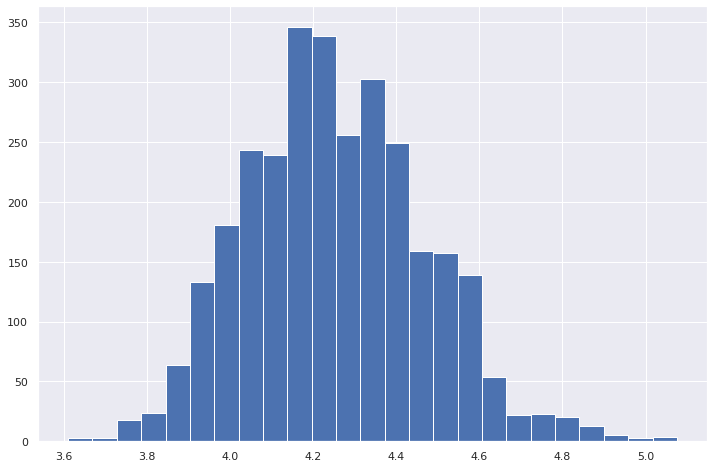

In [52]:
aux_q4.hist(bins = 25)

### Análise da questão 5:

In [72]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [73]:
athletes.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [74]:
bra = athletes[athletes.nationality == 'BRA']
usa = athletes[athletes.nationality == 'USA']
can = athletes[athletes.nationality == 'CAN']

In [75]:
athletes.nationality.value_counts()

USA    567
BRA    485
GER    441
AUS    431
FRA    410
      ... 
SWZ      2
SOM      2
MTN      2
DMA      2
TUV      1
Name: nationality, Length: 207, dtype: int64

In [80]:
?sct.ttest_ind

In [79]:
aux_q5 = sct.ttest_ind(bra.height, usa.height, equal_var = False, nan_policy = 'omit' )

In [81]:
stats_q5, p_value_q5 = aux_q5

In [82]:
bool(p_value_q5 > 0.05)

False

In [88]:
p_value_q5

0.0013080041830140115

### Análise da questão 6:

In [83]:
aux_q6 = sct.ttest_ind(bra.height, can.height, equal_var = False, nan_policy = 'omit' )
stats_q6, p_value_q6 = aux_q6
bool(p_value_q6 > 0.05)

True

In [86]:
p_value_q6

0.5230827295440921

### Análise da questão 7:

In [84]:
aux_q7 = sct.ttest_ind(usa.height, can.height, equal_var = False, nan_policy = 'omit' )
stats_q7, p_value_q7 = aux_q7
bool(p_value_q7 > 0.05)

False

In [87]:
p_value_q7

0.0004660129347389851

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [6]:
def q1():
    aux = get_sample(athletes, 'height', 3000)
    stats, p_value = sct.shapiro(aux)
    return bool(p_value > 0.05)
    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
def q2():
    aux = get_sample(athletes, 'height', 3000)
    stats_q2, p_value_q2 = sct.jarque_bera(aux)
    return bool(p_value_q2 > 0.05)
    pass

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [8]:
def q3():
    sample_weight = get_sample(athletes, 'weight', 3000)
    stats_q3, p_value_q3 = sct.normaltest(sample_weight)
    return bool(p_value_q3 > 0.05)
    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [9]:
def q4():
    sample_weight_q4 = get_sample(athletes, 'weight', 3000)
    aux_q4 = np.log(sample_weight_q4)
    stats_q4, p_value_q4 = sct.normaltest(aux_q4)
    return bool(p_value_q4 > 0.05)
    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [10]:
def q5():
    bra = athletes[athletes.nationality == 'BRA']
    usa = athletes[athletes.nationality == 'USA']
    aux_q5 = sct.ttest_ind(bra.height, usa.height, equal_var = False, nan_policy = 'omit' )
    stats_q5, p_value_q5 = aux_q5
    return bool(p_value_q5 > 0.05)
    pass

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [11]:
def q6():
    bra = athletes[athletes.nationality == 'BRA']
    can = athletes[athletes.nationality == 'CAN']
    aux_q6 = sct.ttest_ind(bra.height, can.height, equal_var = False, nan_policy = 'omit' )
    stats_q6, p_value_q6 = aux_q6
    return bool(p_value_q6 > 0.05)
    pass

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [12]:
def q7():
    usa = athletes[athletes.nationality == 'USA']
    can = athletes[athletes.nationality == 'CAN']
    aux_q7 = sct.ttest_ind(usa.height, can.height, equal_var = False, nan_policy = 'omit' )
    stats_q7, p_value_q7 = aux_q7
    return bool(p_value_q7 > 0.05)
    pass

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?